In [1]:
len([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.])

SyntaxError: invalid syntax (1986161080.py, line 1)

In [18]:
import os
import sys

import matplotlib.pyplot as plt
import pickle
import numpy as np 

sys.path.append("..")
from utils.utils import block_crossval, random_crossval

In [2]:
search_range = range(5, 35, 2)
def plot_csp_results(exp):
    with open('results/csp_' + exp + '_tuning.pickle', 'rb') as handle:
        rscores, bscores = pickle.load(handle)
        
    print("CSP - maximal accuracy over 2hz frequency bands : ", max([np.mean(b) for b in bscores]))
    plt.boxplot(bscores)
    plt.xticks(range(len(search_range)),search_range)
    plt.show()

    
    

In [10]:
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score
def auc_scoring(y, y_pred):
    auc_threshold = np.median(y)
    print(auc_threshold)
    ix_true = np.where(y > auc_threshold)[0]
    y_binary = np.zeros(y.shape)
    y_binary[ix_true] = 1
    score = roc_auc_score(y_binary, y_pred - auc_threshold)
    print()
    return score

In [20]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=5,
                          n_estimators=10,
                          n_jobs=3,
                          eval_metric="logloss",
                          use_label_encoder=False)

exp= "8"
bscores = []
rscores = []

metric = roc_auc_score #accuracy_score #auc_scoring

with open('results/psid_'+exp+'.pickle', 'rb') as handle:
    X, y, blocks_idx = pickle.load(handle)

print(X.shape, y.shape)

rscores.append(random_crossval(X, y, model, metric = metric))

bscores.append(block_crossval(X, y, model, blocks_idx, metric = metric))


(636, 140) (636,)


TypeError: random_crossval() got an unexpected keyword argument 'metric'

In [8]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=5,
                          n_estimators=10,
                          n_jobs=3,
                          eval_metric="logloss",
                          use_label_encoder=False)

exp= "8"
bscores = []
rscores = []

with open('results/psid_'+exp+'.pickle', 'rb') as handle:
    X, y, blocks_idx = pickle.load(handle)

print(X.shape, y.shape)
try:
    rscores.append(random_crossval(X, y, model))
except:
    rscores.append([0])
bscores.append(block_crossval(X, y, model, blocks_idx))


NameError: name 'xgb' is not defined

In [ ]:
##### see if channel names are kept after the ICA

In [8]:
import sys
sys.path.append("..")
from utils.csp_example import project_ica

In [3]:
import mne

In [4]:
exp="1"

In [5]:
epochs = mne.read_epochs("data/VP" + exp + "_epo.fif")
ica_model = mne.preprocessing.read_ica("data/VP" + exp + "_ica.fif")

Reading /media/tidiane/D:/dev/bsd_lab/psid/may_17/data/VP1_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    9010.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Reading data/VP1_ica.fif ...
Now restoring ICA solution ...
Ready.


In [9]:
pick_ch = [ch for ch in epochs.info['ch_names'] if ch in ica_model.info['ch_names']]
epochs_ica = project_ica(epochs.copy().pick_types(eeg=True).pick_channels(pick_ch), ica_model)

In [12]:
epochs.info['ch_names']

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'F9',
 'F10',
 'P9',
 'P10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FT7',
 'FC3',
 'FCz',
 'FC4',
 'FT8',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO5',
 'POz',
 'PO6',
 'PO8',
 'Oz',
 'EOGvu',
 'x_EMG1',
 'x_EMG2',
 'x_resp',
 'x_pulse',
 'dist_t_n',
 'pos_t_x',
 'pos_t_y',
 'speed_t_x',
 'speed_t_y',
 'accel_t_x',
 'accel_t_y',
 'jerk_t_x',
 'jerk_t_y',
 'blk_idx',
 'trial_nbr',
 'stim']

In [20]:
import numpy as np
stim_idx = epochs.info['ch_names'].index('stim')
stim = np.nanmean(epochs.get_data()[:, stim_idx, :], axis=1)
#np.asarray(epochs.get_data()[:, stim_idx, :])

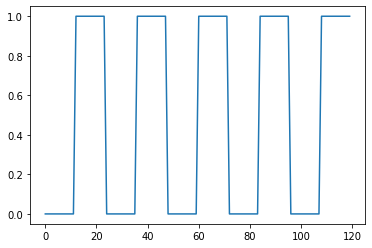

In [22]:
import matplotlib.pyplot as plt
plt.plot(stim)

In [24]:
pick_ch = [ch for ch in epochs.info['ch_names'] if ch in ica_model.info['ch_names']]
epochs_ica = project_ica(epochs.copy().pick_types(eeg=True).pick_channels(pick_ch), ica_model)

In [26]:
epochs.copy().pick_channels(epochs.copy().info['ch_names'],exclude=["stim"]).info['ch_names']

TypeError: pick_channels() got an unexpected keyword argument 'exclude'

In [33]:
pick_ch = [ch for ch in epochs.info['ch_names'] if ch != "stim"]
epochs.copy().pick_types(misc=True).pick_channels(pick_ch).info['ch_names']

['x_EMG1',
 'x_EMG2',
 'x_resp',
 'x_pulse',
 'dist_t_n',
 'pos_t_x',
 'pos_t_y',
 'speed_t_x',
 'speed_t_y',
 'accel_t_x',
 'accel_t_y',
 'jerk_t_x',
 'jerk_t_y',
 'blk_idx',
 'trial_nbr',
 'stim']

In [30]:
epochs.info

<Info | 12 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 EOG, 16 misc
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dig: 66 items (3 Cardinal, 63 EEG)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 45.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 80
 projs: []
 sfreq: 300.0 Hz
>